#### Import Packages

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

#### Clone Dataset Repository

In [3]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 28.23 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [4]:
import os

base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_dir_covid19 = os.path.join(train_dir, 'COVID19')
train_dir_normal = os.path.join(train_dir, 'NORMAL')
test_dir_covid19 = os.path.join(test_dir, 'COVID19')
test_dir_normal = os.path.join(test_dir, 'NORMAL')

In [5]:
train_covid19_images = os.listdir(train_dir_covid19)
train_normal_images = os.listdir(train_dir_normal)
test_covid19_images = os.listdir(test_dir_covid19)
test_normal_images = os.listdir(test_dir_normal)

#### Image Augmentation

In [6]:
#Performs Augmentation (horizontal flip and zoom) on the training data set and splits 20% as validation set
train_datagen = ImageDataGenerator(rescale=1./255, validation_split= 0.2, horizontal_flip= True, zoom_range= 0.2)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Create training data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), subset = "training",class_mode='binary', batch_size=32)
#Create validation data
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), subset = "validation",class_mode='binary', batch_size=32)
#Create testing data
test_generator = train_datagen.flow_from_directory(test_dir, target_size=(150,150),class_mode='binary', batch_size=32)

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [8]:
train_generator.image_shape

(150, 150, 3)

#### Create Model

In [9]:
model = Sequential()
# First CNN Layer
model.add(Conv2D(32, (5,5), padding='SAME', activation='relu', input_shape=(150, 150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Second CNN Layer
model.add(Conv2D(64, (5,5), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(256, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

#### Compile And Training Model

In [10]:
# Compile Model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam', metrics=['accuracy'], loss='binary_crossentropy')

In [12]:
# Train Model
history = model.fit(train_generator, epochs=30, validation_data=validation_generator, validation_steps=10)

Epoch 1/30
46/46 [==============================] - 44s 965ms/step - loss: 1.1936 - accuracy: 0.7453 - val_loss: 0.4036 - val_accuracy: 0.8344
Epoch 2/30
46/46 [==============================] - 45s 981ms/step - loss: 0.2436 - accuracy: 0.8999 - val_loss: 0.1732 - val_accuracy: 0.9469
Epoch 3/30
46/46 [==============================] - 44s 965ms/step - loss: 0.1598 - accuracy: 0.9365 - val_loss: 0.1428 - val_accuracy: 0.9531
Epoch 4/30
46/46 [==============================] - 45s 971ms/step - loss: 0.1675 - accuracy: 0.9427 - val_loss: 0.1261 - val_accuracy: 0.9531
Epoch 5/30
46/46 [==============================] - 45s 975ms/step - loss: 0.1576 - accuracy: 0.9441 - val_loss: 0.1373 - val_accuracy: 0.9688
Epoch 6/30
46/46 [==============================] - 45s 968ms/step - loss: 0.1403 - accuracy: 0.9489 - val_loss: 0.1571 - val_accuracy: 0.9594
Epoch 7/30
46/46 [==============================] - 45s 968ms/step - loss: 0.1354 - accuracy: 0.9496 - val_loss: 0.1231 - val_accuracy: 0.9656

#### Model Evaluation

In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print('test_loss: {}, test_Accuracy: {}'.format(test_loss, test_acc))

16/16 [==============================] - 11s 678ms/step - loss: 0.0670 - accuracy: 0.9793
test_loss: 0.06698830425739288, test_Accuracy: 0.9793388247489929


#### Model Result Visuaization

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epochs')

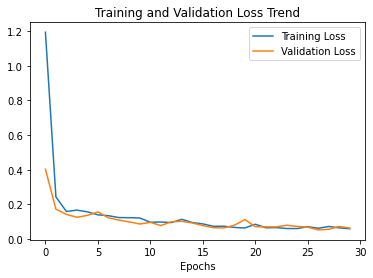

In [20]:
# Plot Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Loss Trend')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

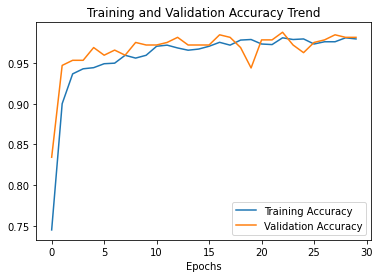

In [26]:
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracy Trend')
plt.xlabel('Epochs')

#### Save Model

In [22]:
model.save('Covid19_Xray_Predictor_acc_98.h5')

#### Testing Model With New Files

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/'+fn
  print(path)
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('Covid-19 Positive')
  else:
    print('Covid-19 Negative')

Saving Normal-chest-X-ray-CXR.jpg to Normal-chest-X-ray-CXR.jpg
/content/Normal-chest-X-ray-CXR.jpg
Normal-chest-X-ray-CXR.jpg
Covid-19 Positive
